# Unidad 3 - Actividad 1
# Materia: **Análisis de Algoritmos y Estructuras para Datos Masivos**
# Alumno: **Luis Fernando Izquierdo Berdugo**
# Fecha: **28 de Agosto de 2024**

**Objetivo**

Analizar y comparar la eficiencia de distintos algoritmos de búsqueda en listas de posteo, enfocándose en el análisis gráfico y la interpretación de los experimentos realizados.

**Instrucciones**
1. **Preparación de Datos**

- Utilice el archivo `listas-posteo-100.json`, que contiene las 100 listas de posteo más frecuentes en formato JSON. Trabaje solo con las listas, excluyendo los términos asociados.

- Asegúrese de no realizar copias mientras se manipulan los arreglos. Si se utiliza el ndarray o array se puede controlar la organización de memoria de los arreglos, también se puede asegurar que se manipulan solo valores numéricos nativos y no objetos de Python.

2. **Selección de Identificadores**

- Seleccione aleatoriamente 1000 identificadores de documentos, con valores entre 1 y n (donde n=50000).

3. **Experimentación y Medición**

- Mida el tiempo promedio de búsqueda para los 1000 identificadores en todas las listas (considerando 100×1000 operaciones).
- Determine la posición de inserción en cada búsqueda.
- Evalúe los siguientes algoritmos:
    - Búsqueda binaria acotada.
    - Búsqueda secuencial B_0​.
    - Búsqueda no acotada B_1.
    - Búsqueda no acotada B_2​.
    
**Nota:** Repita las búsquedas varias veces y promedielos para obtener mediciones más robustas.

4. **Análisis de Datos y Gráfica**

- Elabore una única gráfica que muestre los tiempos de ejecución en el eje Y y los algoritmos evaluados en el eje X.
- Realice un análisis detallado de esta gráfica, identificando patrones, diferencias y posibles explicaciones para el rendimiento de cada algoritmo.

5. **Desarrollo Teórico**

- Describa en pseudo-código la implementación de la búsqueda casi óptima *$B_k$*, explicando su lógica y funcionamiento

## Inciso 1 - Preparación de Datos
Lo primero será importar los módulos de Python a utilizar, en este caso serán `numpy`y `json`.

In [289]:
import json
import numpy as np

Debido a que el archivo no viene en el formato `json` común, se hizo un anális en el que se encontró que cada línea del archivo incluye la clave de la lista de posteo y los valores, por lo cual se desarrolló un código que analiza línea por línea para guardar los datos en un diccionario creado previamente llamado `valores`.

In [290]:
val = {}
with open('/Users/izluis/Documents/Maestria/Análisis de Algoritmos y Estructuras para Datos Masivos/Unidad 3/Unidad03-busqueda/datos/listas-posteo-100.json') as file:
  for line in file:
    data = json.loads(line)
    key, values = data
    val[key] = np.array(values)

## Inciso 2 - Selección de Identificadores

Se ejecuta un código sencillo para seleccionar 1000 valores aleatorios entre 1 y 5000, los cuales no se pueden repetir.

In [291]:
rango = np.arange(1, 5000 + 1)
ids = rango[np.random.choice(len(rango), size = 1000, replace=False)]

## Inciso 3 - Experimentación y Medición

Primero se crea una función que mida el tiempo de ejecución de los algoritmos (que estarán en diferentes funciones).
Esta iterará entre los identificadores para buscar en cada una de las listas un identificador específico; antes de entrar a la función que hace cada una de las busquedas se guarda el tiempo de inicio con el módulo `time`de python.

Al salir de la función de busqueda, guardará las posiciones de cada identificador encontrado o insertado con la busqueda y sacará el promedio del tiempo tomado en cada búsqueda. Esta función devolverá el promedio de segundos tomados con la función y las posiciones de los indicadores en las listas de posteo.

In [292]:
import time
def times(function):
    total = 0
    positions = []
    for id in ids:
        start_time = time.process_time()
        for list in val.values():
            position = function(list, id)
            positions.append(position)
        final_time = time.process_time()
        total = final_time - start_time
    promedio = total / len(ids)*len(val)
    return promedio, positions

La primera función que se definió fue la `Busqueda Binaria Acotada`. En esta se toma el inicio y final de la lista, ya que se conoce y evaluará si la mitad de estos datos es igual al identificador que estamos buscando. Si no lo encuentra en primera instancia y el valor que se está evaluando es menor que el identificador, entonces el nuevo valor de inicio será una posición más adelante que el valor evaluado. En caso contrario (valor evaluado es mayor que el identificador), el nuevo valor de final será una posición anterior a la evaluada.

Si encuentra el valor, entonces lo devuelve. Si no encuentra el valor, entonces devolverá el lugar de la lista en el que este debería ir (una posición más adelante del valor final).

In [293]:
def bin_acot(lista, id):
    start = 0
    end = len(lista) -1
    while start <= end:
        middle = (start+end)//2
        if lista[middle] == id:
            return middle
        elif lista[middle] < id:
            start = middle+1
        else:
            end = middle - 1
    return end + 1
        

Para la `Busqueda Secuencial` $B_0$ se evalúan los elementos de la lista que se ennumerará uno a uno; si el elemento es el que estamos buscando (el identificador), entonces se devuelve su posición i, si es mayor al identificdor, entonces se devuelve la posición actual (para su inserción). En el último caso se devolverá la longitud de la lista, ya que irá al final de esta.

In [294]:
def sec(lista, id):
    for i, elemento in enumerate(lista):
        if elemento == id:
            return i
        elif elemento > id:
            return i
    return len(lista)

Para las funciones de `Busqueda Binomial No Acotada` $B_1$ y `Busqueda Binomial No Acotada` $B_2$ se creo otra función de la función binomial, con la diferencia de que esta acepta los parametros para el límite inferior `start`y superior `end`, con la finalidad de poder modificarlos.

In [295]:
def bin(lista, id, start, end):
    start = start - 1
    end = end -1
    while start <= end:
        middle = (start+end)//2
        if lista[middle] == id:
            return middle
        elif lista[middle] < id:
            start = middle+1
        else:
            end = middle - 1
    return end + 1

La funcion de la `Busqueda Binomial No Acotada` $B_1$ declara un índice `index` y las evaluaciones `m` que se han hecho. Se entrará a un ciclo while que evaluará:
- Si las evaluaciones menos una son menores que la longitud de la lista donde se buscan los indicadores **y**
- Si el valor `m-1` de la lista es menor que el identificador.
En caso de que esto se cumpla, se añadirá uno al índice y las evaluaciones tomarán el valor de dos a la potencia del índice, restado uno (`(2**(index))-1`).

El nuevo límite inferior del rango será el valor de dos a la potencia del índice restado uno (`2**(index-1)`). Si el valor de las evaluaciones es menor o igual a la longitud de la lista, el límite superior será este valor; en caso contrario el límite superior será la longitud de la lista.

Finalmente se regresa el valor del índice encontrado.

In [296]:
def bin_unb(lista, id):
    index = 1
    m = 1
    while (m-1) < len(lista) and lista[m-1] < id:
        index = index + 1
        m = (2**index) - 1
    
    start = (2**(index-1))
    if m <= len(lista):
        end = m
    else:
        end = len(lista)
    indice = bin(lista, id, start, end)
    return indice

La funcion de la `Busqueda Binomial No Acotada` $B_2$ será una copia fiel de la función $B_1$, sin embargo, cambiará el valor de m durante el ciclo while y el valor del límite inferior posterior:
- En vez de `m = (2**index) - 1` se tendrá ` m = (2**((2**index) - 1))-1`
- En vez de `start = (2**(index-1))` se tendrá `start = 2**((2**(index-1))-1)`

In [297]:
def bin_unb2(lista, id):
    index = 1
    m = 1
    while (m-1) < len(lista) and lista[m-1] < id:
        index = index + 1
        m = (2**((2**index) - 1))-1
    
    start = 2**((2**(index-1))-1)
    if m <= len(lista):
        end = m
    else:
        end = len(lista)
    indice = bin(lista, id, start, end)
    return indice

Se ejecutan todas las funciones de búsqueda en 5 ocasiones seguidas para sacar el promedio de tiempo que toman estas ejecuciones.

In [298]:
promedio_bin_1, pos_bin_1 = times(bin_acot)
promedio_bin_2, pos_bin_2 = times(bin_acot)
promedio_bin_3, pos_bin_3 = times(bin_acot)
promedio_bin_4, pos_bin_4 = times(bin_acot)
promedio_bin_5, pos_bin_5 = times(bin_acot)

promedio_bin = (promedio_bin_1 + promedio_bin_2 + promedio_bin_3 + promedio_bin_4 + promedio_bin_5)/5
print(f"Tiempo promedio para el algoritmo binario acotado {promedio_bin}")
#print(pos_bin_1)


Tiempo promedio para el algoritmo binario acotado 3.6039999999957215e-05


In [299]:
promedio_sec_1, pos_sec_1 = times(sec)
promedio_sec_2, pos_sec_2 = times(sec)
promedio_sec_3, pos_sec_3 = times(sec)
promedio_sec_4, pos_sec_4 = times(sec)
promedio_sec_5, pos_sec_5 = times(sec)

promedio_sec = (promedio_sec_1 + promedio_sec_2 + promedio_sec_3 + promedio_sec_4 + promedio_sec_5)/5
print(f"Tiempo promedio para el algoritmo de busqueda secuencial {promedio_sec}")
#print(pos_sec_1)

Tiempo promedio para el algoritmo de busqueda secuencial 0.00024335999999948397


In [300]:

promedio_b1_1, pos_b1_1 = times(bin_unb)
promedio_b1_2, pos_b1_2 = times(bin_unb)
promedio_b1_3, pos_b1_3 = times(bin_unb)
promedio_b1_4, pos_b1_4 = times(bin_unb)
promedio_b1_5, pos_b1_5 = times(bin_unb)

promedio_b1 = (promedio_b1_1 + promedio_b1_2 + promedio_b1_3 + promedio_b1_4 + promedio_b1_5)/5

print(f"Tiempo promedio para el algoritmo binario no acotado {promedio_b1}")
#print(pos_b1_1)

Tiempo promedio para el algoritmo binario no acotado 3.8579999999797105e-05


In [301]:
promedio_b2_1, pos_b2_1 = times(bin_unb2)
promedio_b2_2, pos_b2_2 = times(bin_unb2)
promedio_b2_3, pos_b2_3 = times(bin_unb2)
promedio_b2_4, pos_b2_4 = times(bin_unb2)
promedio_b2_5, pos_b2_5 = times(bin_unb2)
promedio_b2 = (promedio_b2_1 + promedio_b2_2 + promedio_b2_3 + promedio_b2_4 + promedio_b2_5)/5
print(f"Tiempo promedio para el algoritmo binario no acotado B2 {promedio_b2}")
#print(pos_b2_1)

Tiempo promedio para el algoritmo binario no acotado B2 7.018000000016401e-05


In [302]:
#Se evalúa que todos los resultados sean iguales:
if pos_b1_1 == pos_b2_1 and pos_b2_1 == pos_sec_1 and pos_sec_1 == pos_bin_1:
    print("Todos los índices son iguales")

Todos los índices son iguales


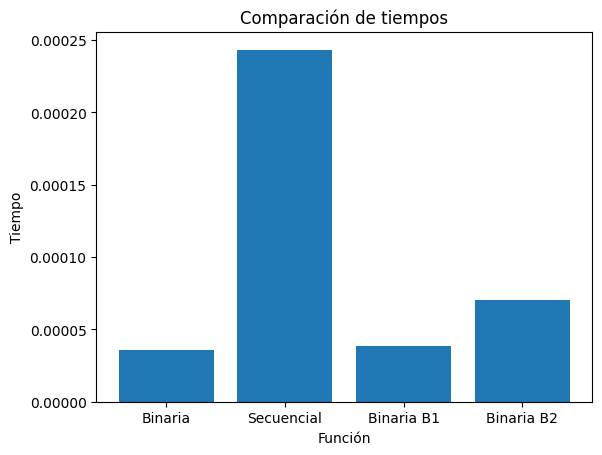

In [303]:
import matplotlib.pyplot as plt
funciones = ['Binaria', 'Secuencial', 'Binaria B1','Binaria B2']
promedios = [promedio_bin, promedio_sec, promedio_b1, promedio_b2]
plt.bar(funciones, promedios)
plt.title('Comparación de tiempos')
plt.xlabel('Función')
plt.ylabel('Tiempo')
plt.show()

En la gráfica generada para la comparación se puede observar que la diferencia entre las búsquedas de tipo Binario son bastante parecidas; a pesar de que en teoría las Binarias no acotadas deberían ir mejorando su tiempo, se puede observar que estas toman ligeramente más tiempo que la binaria acotada. Este comportamiento se puede deber a la cantidad de datos y los tiempos de ejecución tan pequeños que se presentan; es muy probable que los beneficios de estas iteraciones binarias no acotadas se observen de manera superior en conjuntos de datos muchísimo más grandes que los presentados en este análisis.

Definitivamente se puede notar la diferencia entre un método binario y uno secuencial, siendo hasta 4 veces menor el primero; esto se debe a la poca lógica que se emplea al hacer la lógica secuencial, ya que simplemente evalúa dato por dato hasta encontrar el que busca o donde debería ir este.

## Inciso 5 - Desarrollo teórico

Para el algorítmo de busqueda $B_k$ se deberá desarrollar de manera similar al algoritmo $B_2$. En este se reemplazó la búsqueda unaria del algoritmo $B_1$ por una binaria de la forma $F(2^{2^{i-1}-1} - 1)$.

Se podría ir iterando de esto para seguir mejorando los tiempos de ejecución, para obtener el algoritmo $B_{k-1}$. Siendo el pseudo-código de esto el siguiente:

`definición función_algoritmo_bk`

`Parámetros de Entrada:`
- `Lista de valores donde se buscará`
- `Identificador a buscar en los valores`
- `Valor de k`

`índice inicial = 1`

`evaluaciones = 1`

    `para cada una de los valores del rango k:`

        `mientras que el evaluaciones-1 < longitud de la lista **y** lista[evaluaciones-1] < identificador:`

            `índice aumenta en uno`

            `evaluaciones = (2**índice)-1`
            
            `si es la primera iteración:`

                `inicio = 2**(índice-1)`

            `si no es la primera iteración:`

                `evaluaciones = (2**(evaluaciones))-1`

                `inicio = 2**(inicio-1)`

        `Si evaluaciones <= longitud de la lista:`

            `final = evaluaciones`

        `en cualquier otro caso:`

            `final = longitud de la lista`
            
        `Índice devuelto = función binaria(lista, identificador, inicio, fin)`


## Conclusiones

Este experimento sirvió para demostrar los diferentes tiempos de ejecución que tienen los diferentes algoritmos de busqueda, concluyendo que:
- **Busqueda Binaria Acotada:** es el método más rápido para las listas de posteo que se manejaron. Esto es gracias a la reducción del espacio de busqueda, ya que en cada iteración se reducía el espacio a la mitad.
- **Busqueda Secuencial:** es el método menos eficaz (y por lo tanto más costoso) para las listas de posteo. A pesar de que en tamaños de listas pequeños pueda ser útil, conforme la lista va creciendo, su eficacia va disminuyendo de manera equivalente. Este método va uno por uno por todos los datos de la lista hasta encontrar el que se busca.
- **Busqueda Binaria No Acotada $B_1$** y **$B_2$:** Junto con la busqueda acotada son los métodos más veloces, teniendo diferencias mínimas en el tiempo de procesamiento. El èxito de estos algoritmos depende de la efectividad al momento de definir el límite superior; es posible que se encuentren mejores resultados con estos métodos con cantidades de datos mucho más grandes que las manejadas en este experimento, sobretodo si se desconoce la cantidad de estos.

Otras consideraciones que se pueden tener en este experimento para replicarse podrían ser las condiciones del mismo, ya que cosas como el hardware en el que se ejecutó, el sistema operativo, procesador y lenguaje de programación podrían influir en los resultados del experimento.

Si se quisieran aplicar estos algoritmos a sistemas de gran escala se tendrían que tener en cuenta factores como el volumen de los datos, la frecuencia de inserciones y la distrbución de los datos; esto tendría el objetivo de elegir el mejor algoritmo de busqueda para cada sistema específico.